In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
"datasets: {}".format(os.listdir("./gee-weather-data/"))

"datasets: ['era5_ke_weather_data_from_2000-01-01_to_2010-01-01.csv', 'era5_ke_weather_data_from_2010-01-01_to_2023-03-01.csv']"

#### Loading the weather datasets

In [3]:
era5_2000_2010 = pd.read_csv("./gee-weather-data/era5_ke_weather_data_from_2000-01-01_to_2010-01-01.csv")
era5_2010_2023 = pd.read_csv("./gee-weather-data/era5_ke_weather_data_from_2010-01-01_to_2023-03-01.csv")

#### Combining the datasets into one dataset

In [4]:
era5_weather = pd.concat([era5_2000_2010, era5_2010_2023])

In [5]:
"rows, columns: {}".format(era5_weather.shape)

'rows, columns: (554704, 13)'

#### Let's take a look at the dataset

In [6]:
era5_weather.head(2)

,county,province,polygon,date,min_2m_temp (K),max_2m_temp (K),mean_2m_temp (K),total_precip,mean_2m_dewpoint (K),mean_sea_level_pressure (hPa),mean_surface_pressure (hPa),mean_u_wind_10m,mean_v_wind_10m
0,Vihiga,Western,"[[34.53460950122016, -0.039904512803640914], [...",2000-01-01,287.819366,302.907715,294.954794,0.000583,288.950359,1009.367205,855.294223,0.176298,0.260900
1,Vihiga,Western,"[[34.53460950122016, -0.039904512803640914], [...",2000-01-02,287.940735,302.816772,295.125493,0.000088,289.081064,1008.522130,854.696495,-0.004849,0.336365


#### Checking the data types

In [7]:
era5_weather.dtypes

county                            object
province                          object
polygon                           object
date                              object
min_2m_temp (K)                  float64
max_2m_temp (K)                  float64
mean_2m_temp (K)                 float64
total_precip                     float64
mean_2m_dewpoint (K)             float64
mean_sea_level_pressure (hPa)    float64
mean_surface_pressure (hPa)      float64
mean_u_wind_10m                  float64
mean_v_wind_10m                  float64
dtype: object

#### Look out for empty/ null entries

In [8]:
era5_weather.isna().sum()

county                              0
province                            0
polygon                             0
date                                0
min_2m_temp (K)                  7496
max_2m_temp (K)                  7496
mean_2m_temp (K)                    0
total_precip                        0
mean_2m_dewpoint (K)                0
mean_sea_level_pressure (hPa)       0
mean_surface_pressure (hPa)         0
mean_u_wind_10m                     0
mean_v_wind_10m                     0
dtype: int64

#### Inspection of null entries

In [9]:
null_entries = era5_weather[era5_weather["min_2m_temp (K)"].isna()]
null_entries.head()

,county,province,polygon,date,min_2m_temp (K),max_2m_temp (K),mean_2m_temp (K),total_precip,mean_2m_dewpoint (K),mean_sea_level_pressure (hPa),mean_surface_pressure (hPa),mean_u_wind_10m,mean_v_wind_10m
266669,Administrative unit not available,Western,"[[33.910179252727914, -0.026924043557204014], ...",2000-01-01,NaN,NaN,296.423987,0.000372,292.296794,1008.758047,882.104976,-0.029183,1.002661
266670,Administrative unit not available,Western,"[[33.910179252727914, -0.026924043557204014], ...",2000-01-02,NaN,NaN,296.630550,0.000538,292.666381,1007.950130,881.463237,0.076065,1.411537
266671,Administrative unit not available,Western,"[[33.910179252727914, -0.026924043557204014], ...",2000-01-03,NaN,NaN,296.692491,0.001012,292.852613,1007.518013,881.028513,0.299427,1.430281
266672,Administrative unit not available,Western,"[[33.910179252727914, -0.026924043557204014], ...",2000-01-04,NaN,NaN,296.339454,0.000489,292.263165,1007.533549,881.008260,0.717154,1.057953
266673,Administrative unit not available,Western,"[[33.910179252727914, -0.026924043557204014], ...",2000-01-05,NaN,NaN,296.549485,0.000358,291.994489,1008.382548,881.778038,0.651067,1.573297


In [10]:
"Affected regions/ counties: {}".format(null_entries["county"].unique())

"Affected regions/ counties: ['Administrative unit not available']"

##### There exist null values for regions whose value for county is 'Administrative unit not available'.
```
 -> It's just right to remove these values
```

In [11]:
era5_weather = era5_weather[era5_weather["county"] != "Administrative unit not available"].reset_index(drop=True)

#### Data visualization:
* A line plot
* A histogram

<AxesSubplot:xlabel='date'>

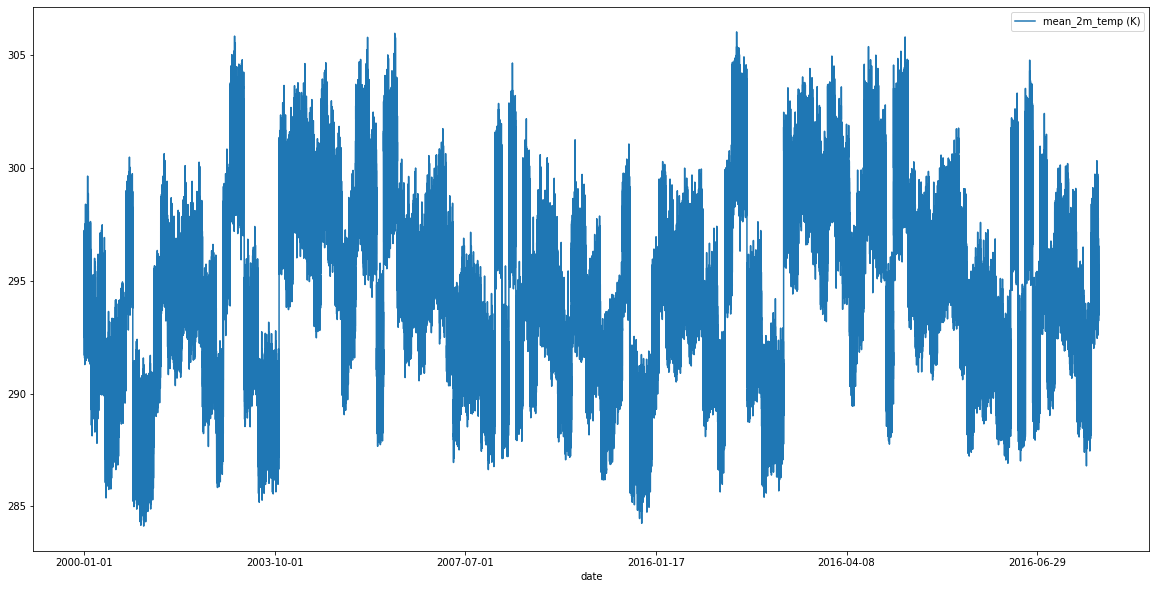

In [12]:
# .
# A dirty plot:
era5_weather.plot(x="date", y="mean_2m_temp (K)", kind="line", figsize=[20, 10])

<AxesSubplot:ylabel='Frequency'>

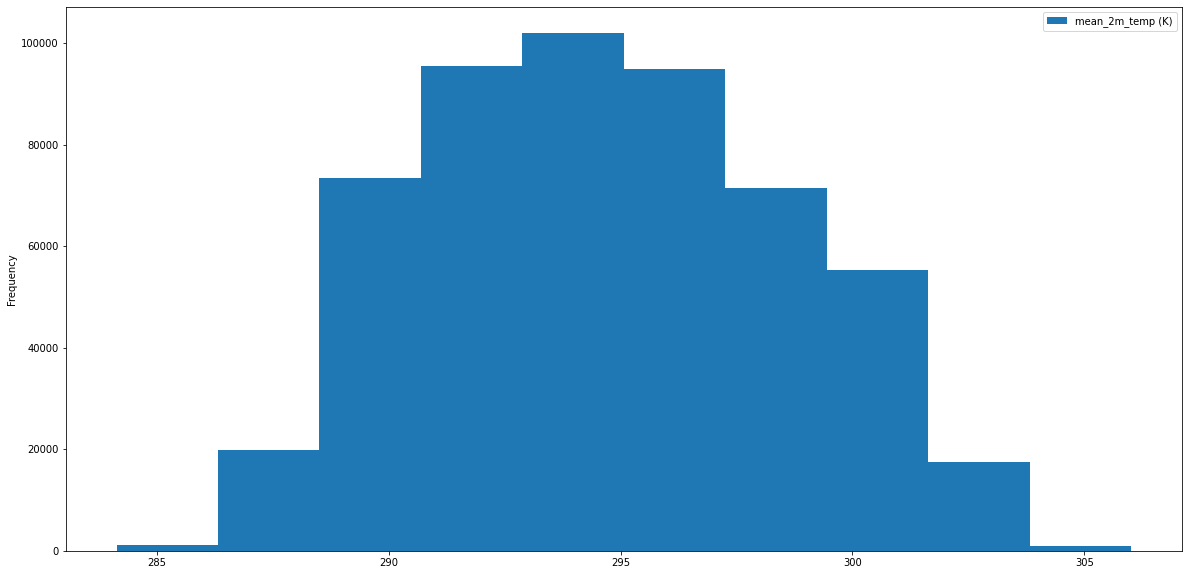

In [13]:
# .
# A histogram chart of the last weather records:
era5_weather.plot(x="date", y="mean_2m_temp (K)", kind="hist", figsize=[20, 10])

#### Saving a clean copy of the dataset in (.csv) format

In [14]:
era5_weather.to_csv("./datasets/gee-weather-data.csv", index=False)